In [1]:
from tokenize import group

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import merged
df = pd.read_parquet('../cache/merged.parquet')

In [4]:
df.columns

Index(['Date', 'Timestamp', 'Actor1Country', 'Actor1GeoCountry', 'Actor1Type',
       'Actor1TypeGeneral', 'Actor2Country', 'Actor2GeoCountry', 'Actor2Type',
       'Actor2TypeGeneral', 'ActionCountry', 'EventType', 'QuadClass',
       'GoldsteinScale', 'NumSources', 'NumArticles', 'AvgTone', 'Source',
       'Magnitude', 'Impact', 'Impact_bin', 'pct_change_15min',
       'pct_change_30min', 'pct_change_24h'],
      dtype='object')

In [5]:
df['AbsChange'] = df['pct_change_30min'].abs()

In [17]:
mag_quantiles = [df.Magnitude.quantile(i) for i in [0, 0.5, 0.9, 0.99]]

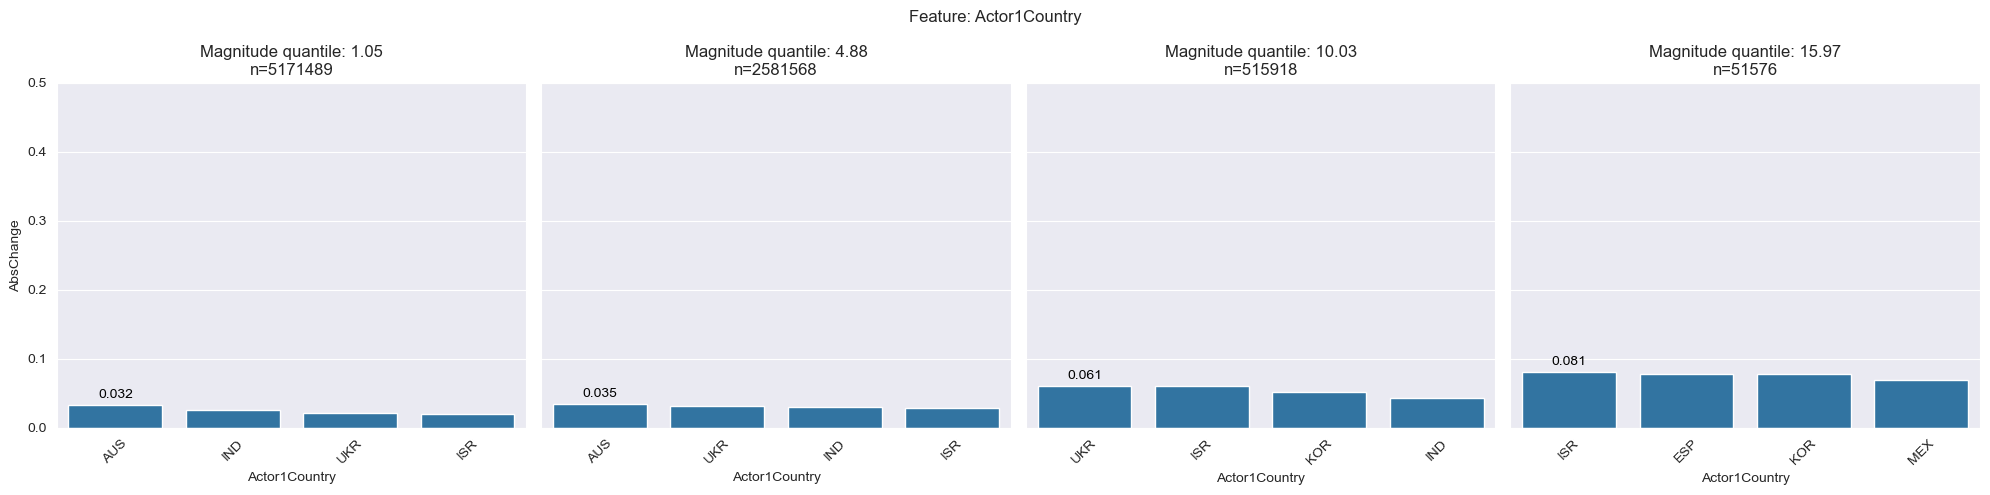

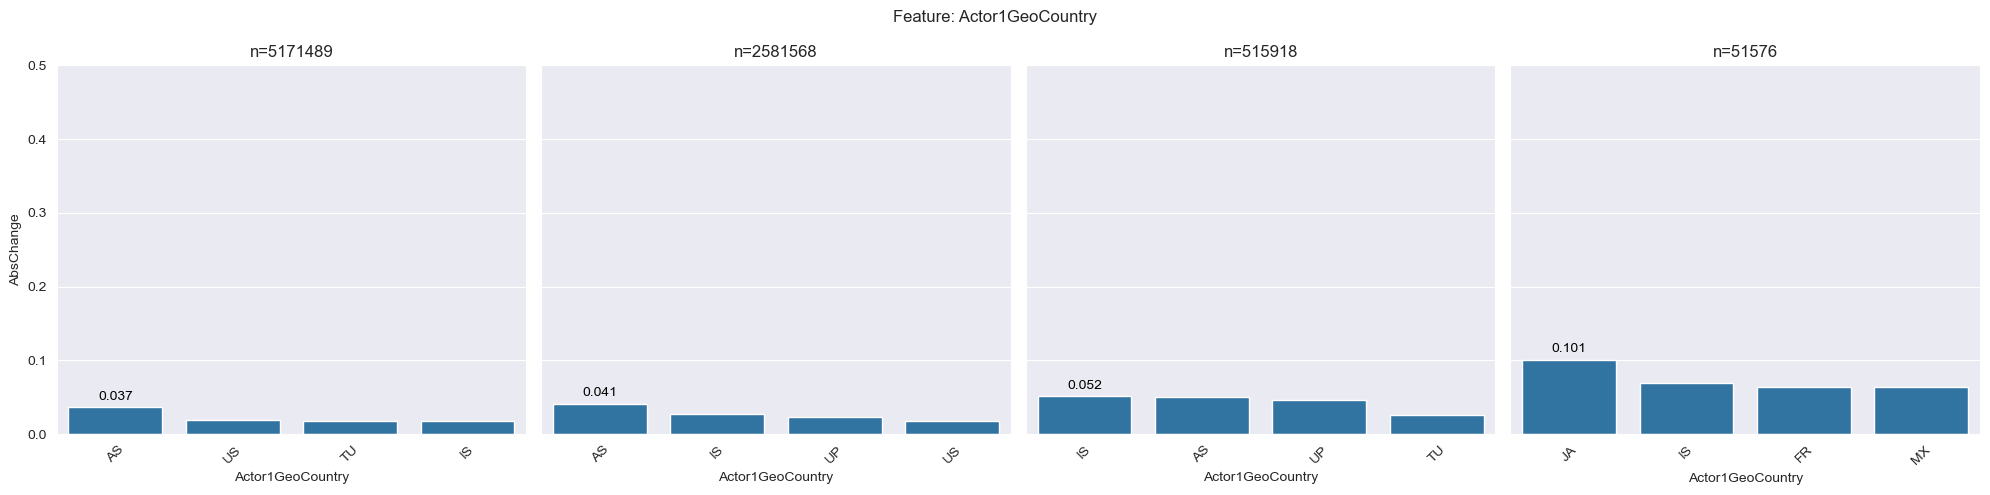

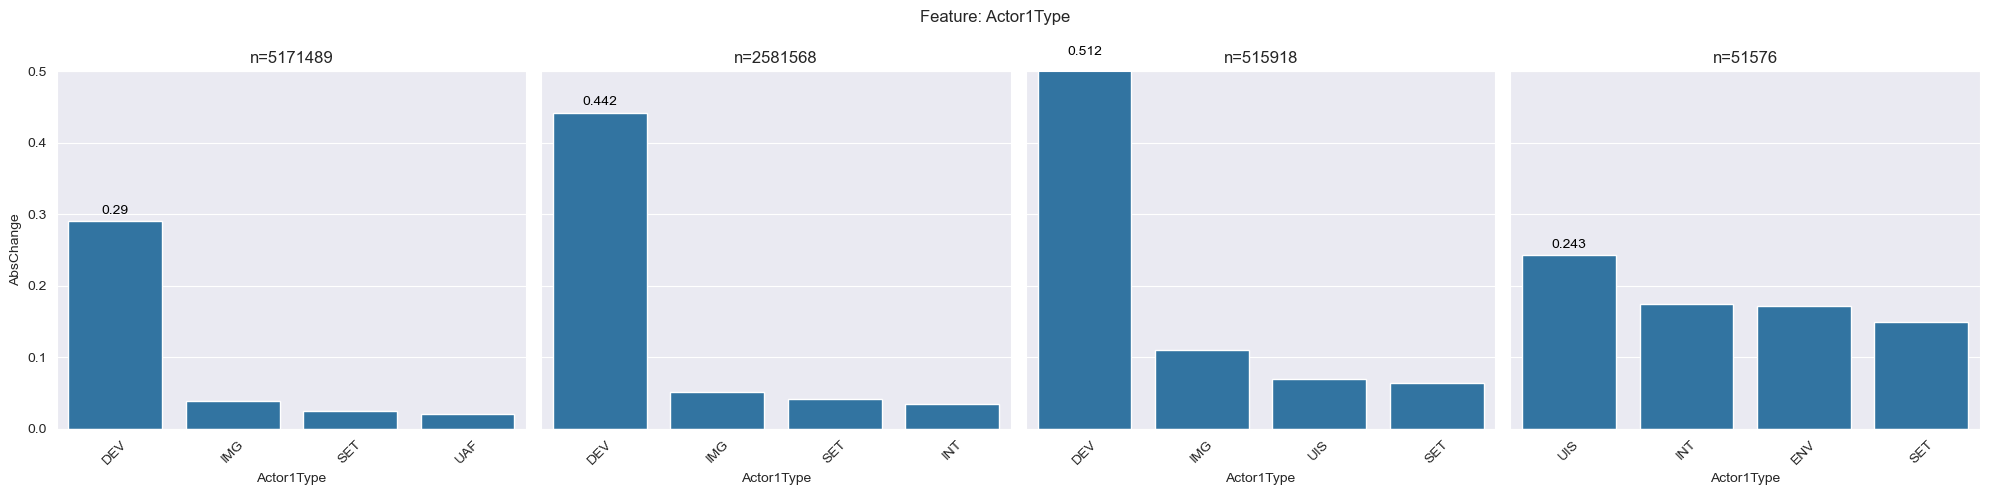

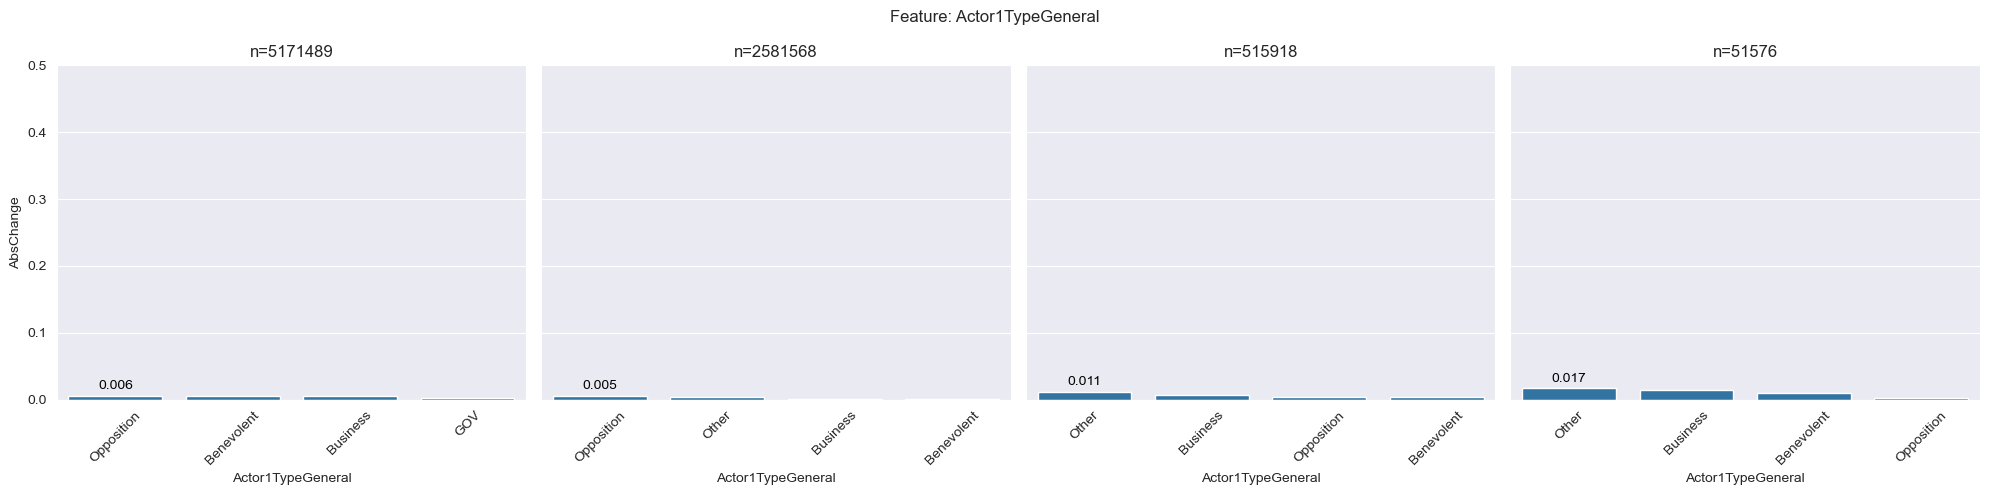

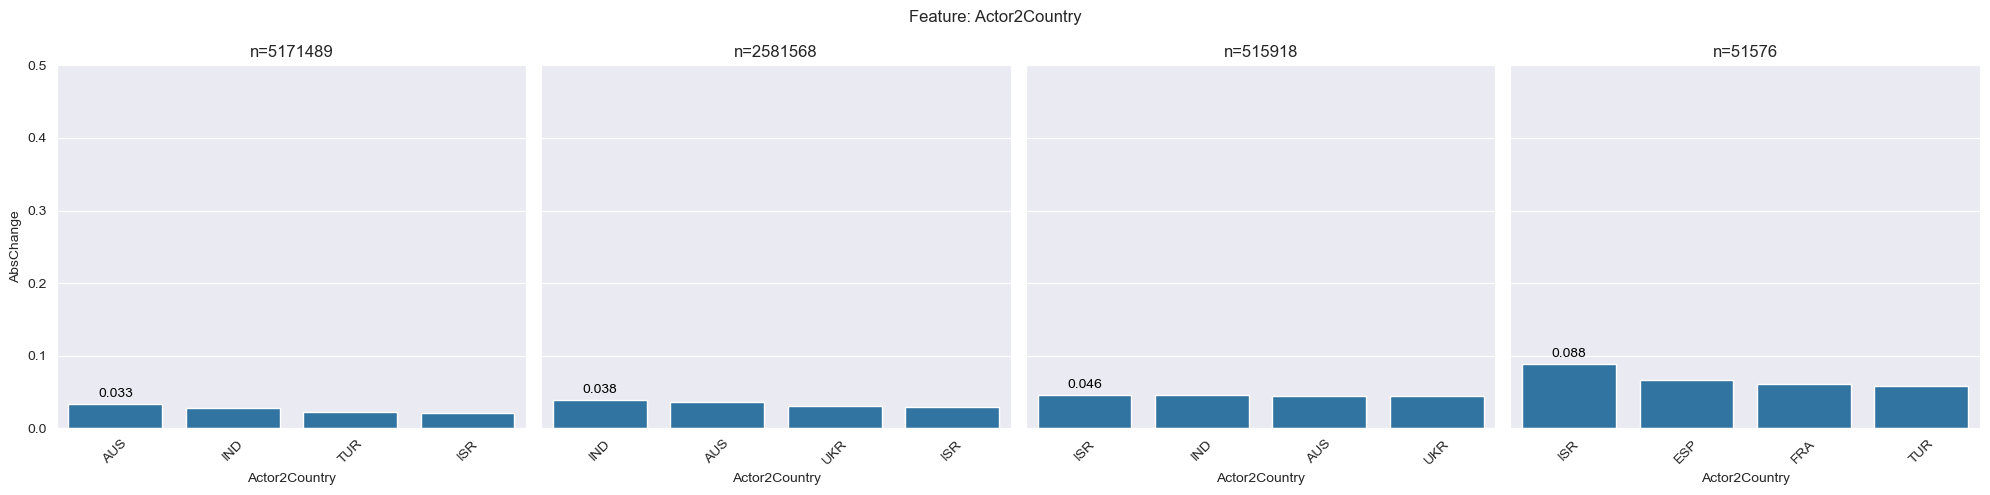

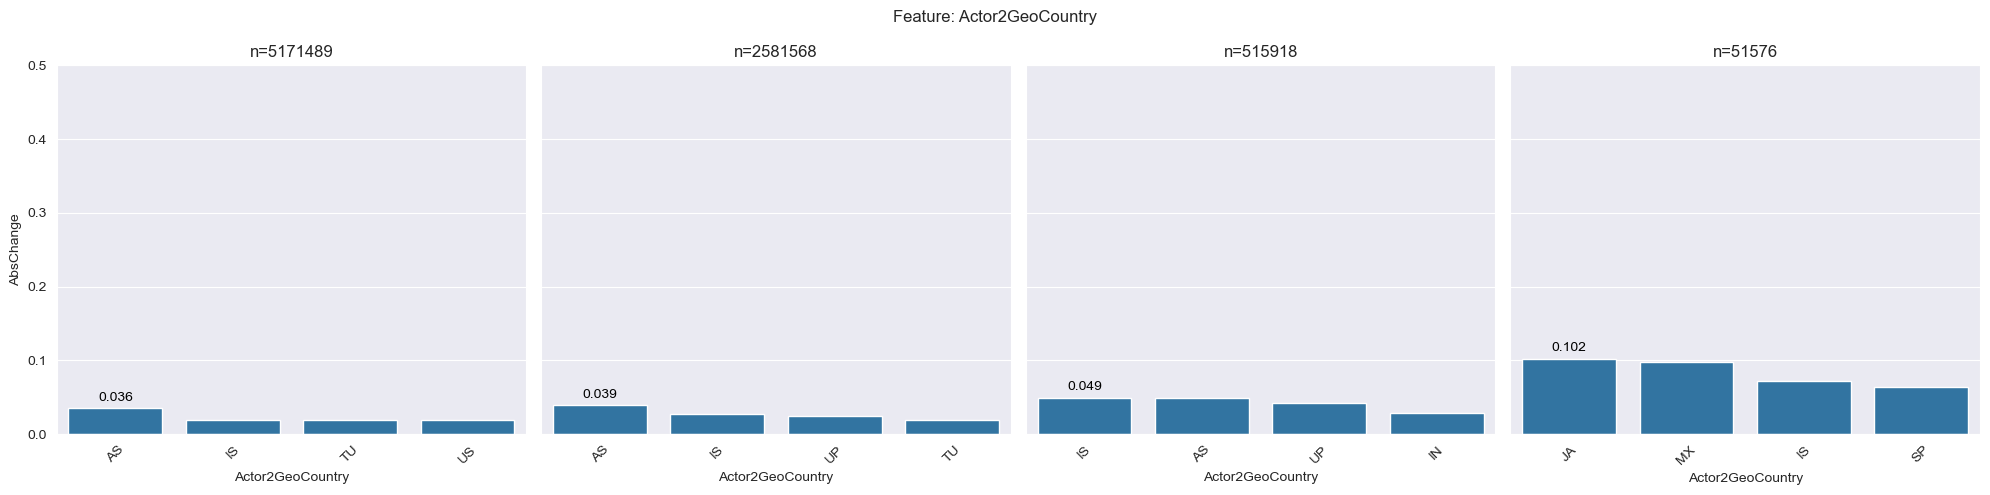

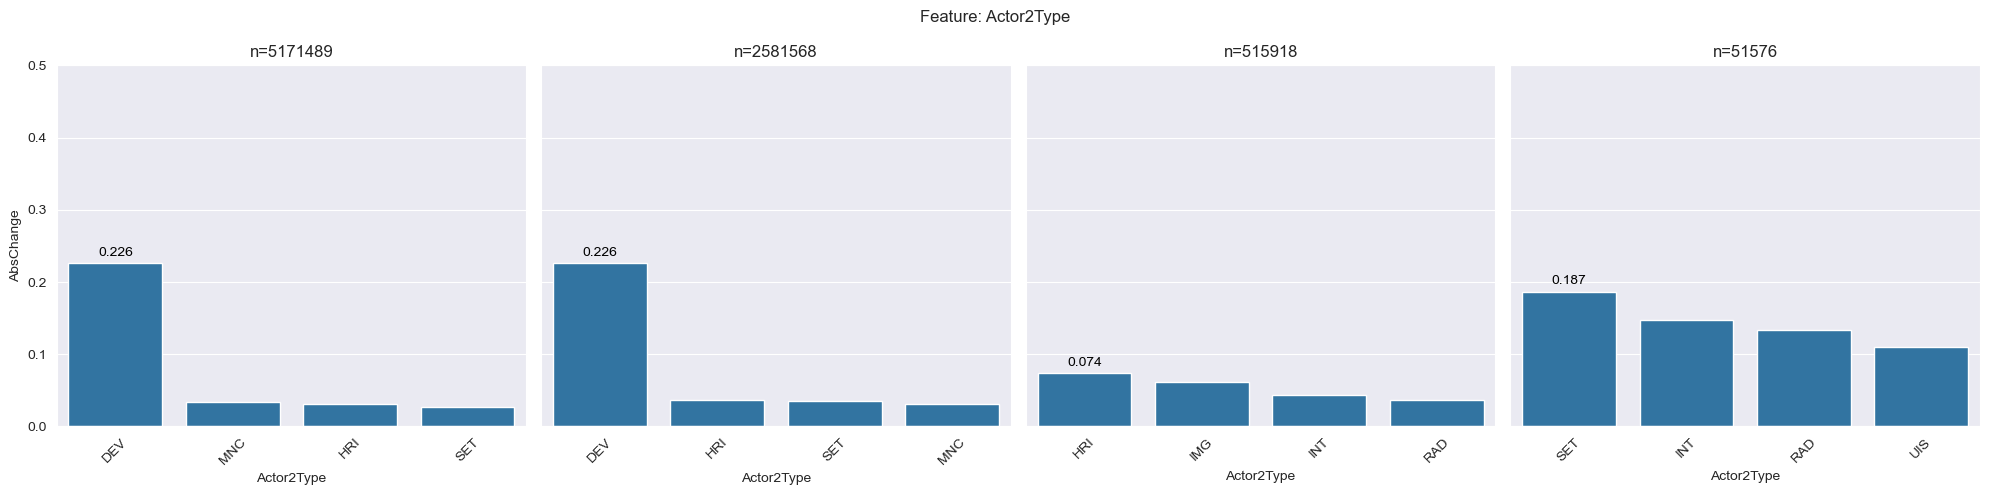

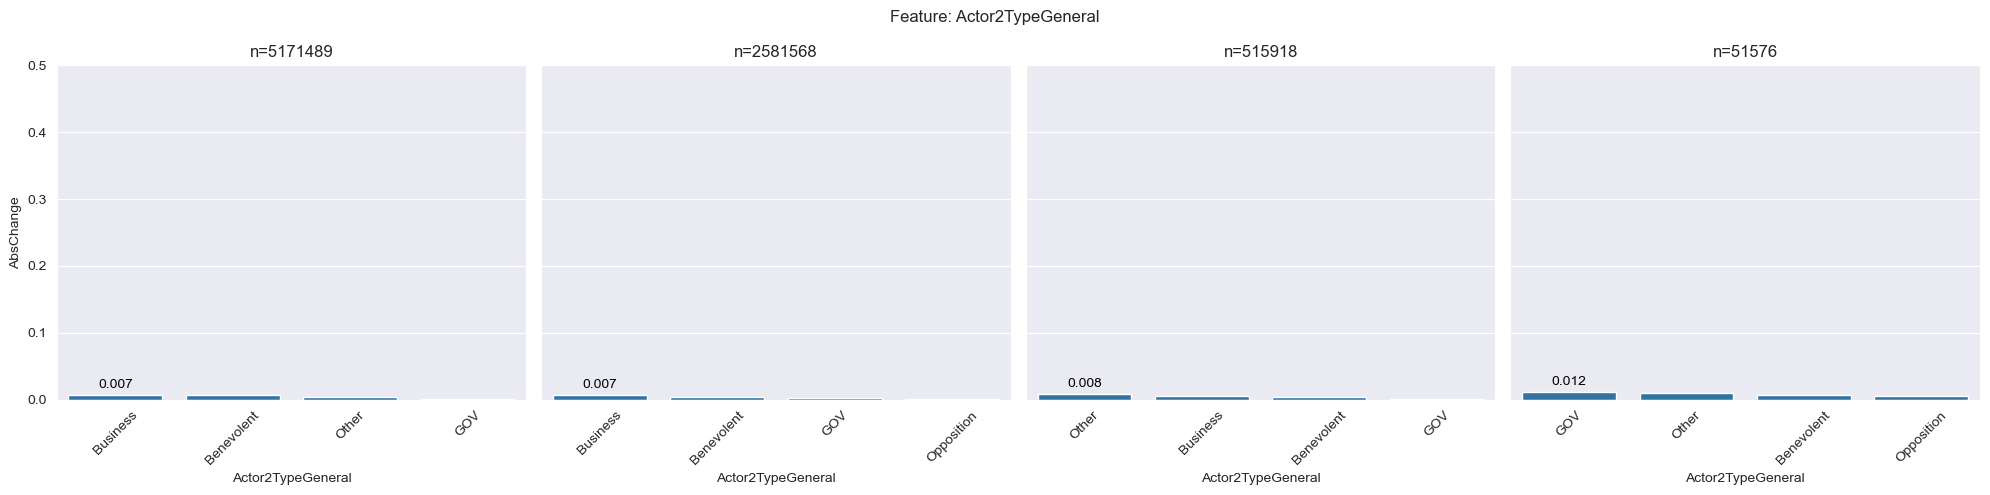

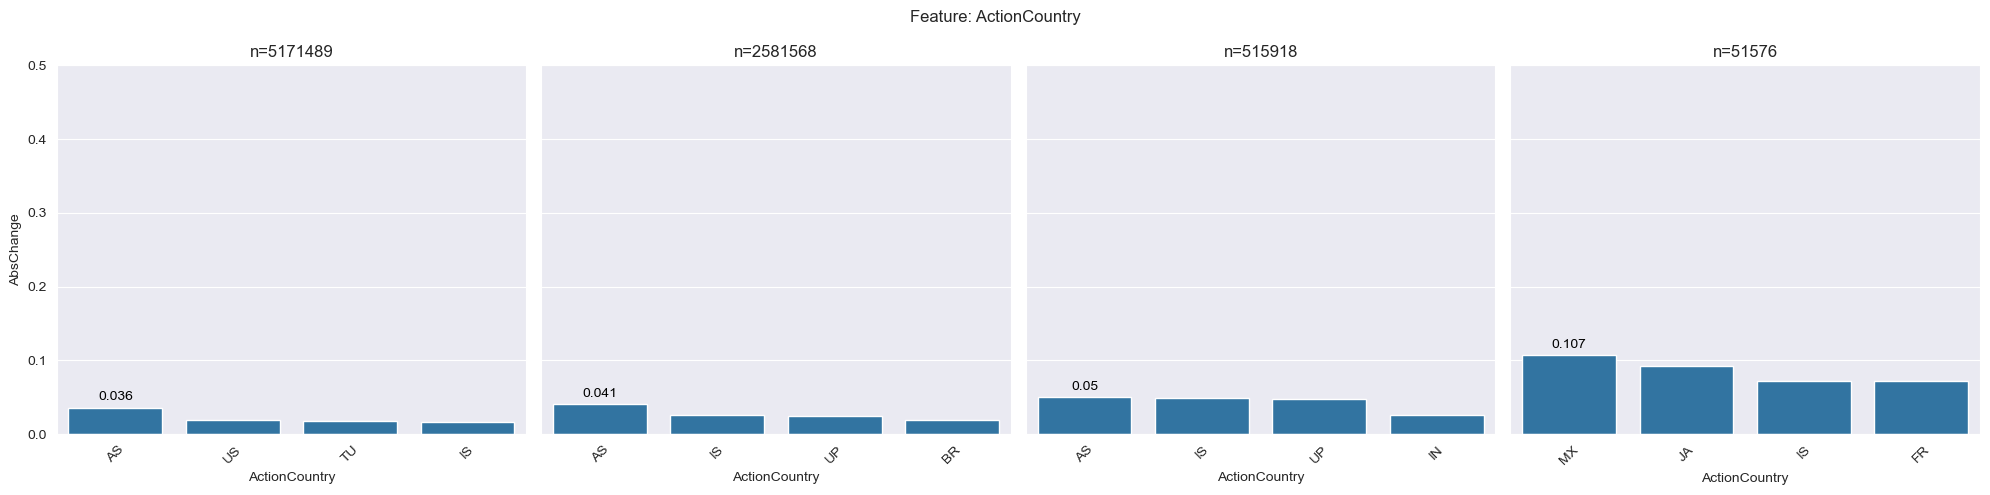

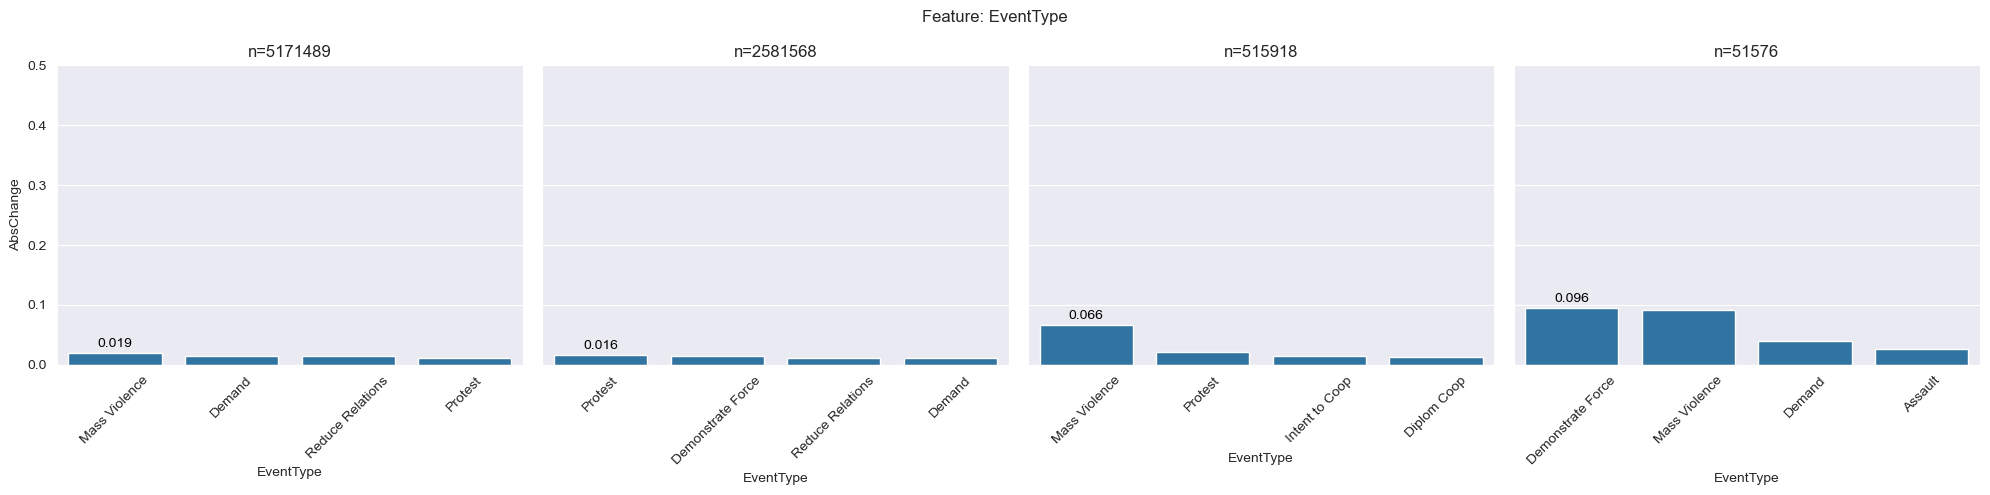

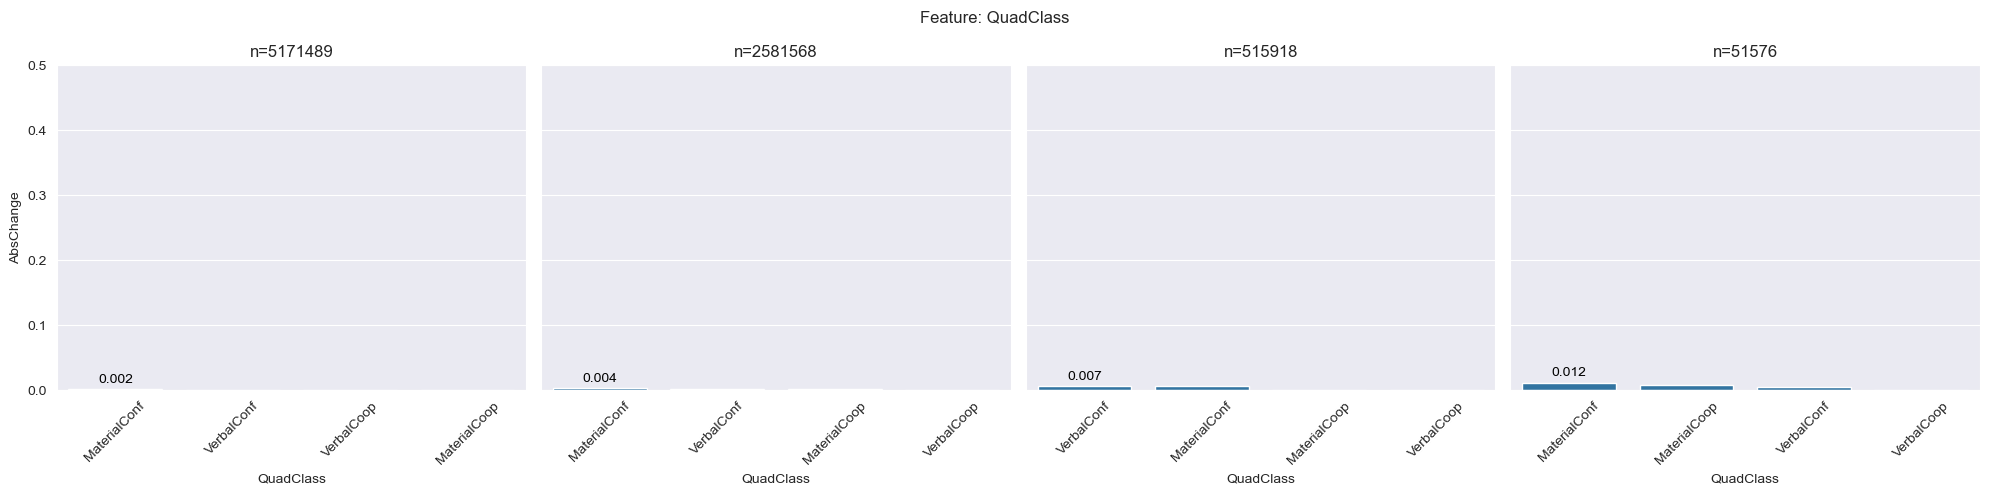

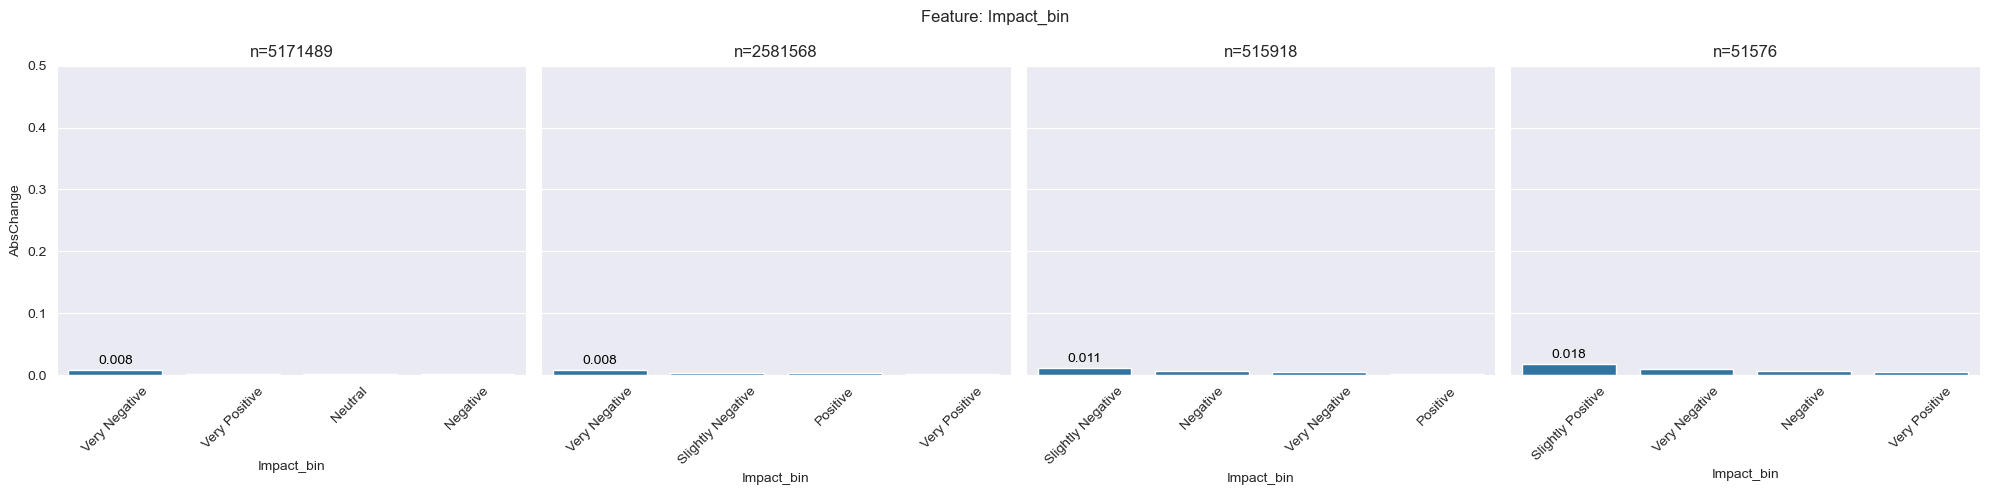

In [59]:
avg_change = df.AbsChange.mean()
catg_features = ['Actor1Country', 'Actor1GeoCountry', 'Actor1Type', 'Actor1TypeGeneral',
                 'Actor2Country', 'Actor2GeoCountry', 'Actor2Type', 'Actor2TypeGeneral',
                 'ActionCountry', 'EventType', 'QuadClass', 'Impact_bin']
# catg_features = ['Actor1Type']
isFirst = True
for feature in catg_features:
    fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
    for i, mag in enumerate(mag_quantiles):
        df_sub = df[df.Magnitude > mag].astype(object)
        df_grouped = (df_sub.groupby([feature], observed=True).AbsChange.mean() - avg_change).abs().sort_values(ascending=False)
        df_grouped = df_grouped[:4]
        df_grouped = df_grouped.reset_index()
        sns.barplot(x=feature, y='AbsChange', data=df_grouped, ax=ax[i])
        highest = df_grouped.iloc[0]
        ax[i].text(highest.name, highest.AbsChange + 0.01, round(highest.AbsChange, 3), color='black', ha="center")
        
        ax[i].xaxis.set_tick_params(rotation=45)
        if isFirst:
            ax[i].set_title(f'Magnitude quantile: {mag_quantiles[i]}\nn={len(df_sub)}')
        else:
            ax[i].set_title(f'n={len(df_sub)}')
    
    plt.ylabel('Avg. Abs. Change')
    isFirst = False    
    plt.ylim(0, 0.5)
    plt.suptitle(f'Feature: {feature}')
    plt.tight_layout()
    plt.show()

We can see that impact_bin, quadclass, and general types don't carry much information and that geo country values provide slightly more info than regural country values. 

In [ ]:
# let's do similar for numerical features
num_features = ['AvgTone', 'GoldsteinScale', 'NumSources', 'NumArticles']

for feature in num_features:
    fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
    for i, mag in enumerate(mag_quantiles):
        df_sub = df[df.Magnitude > mag]
        sns.boxplot(x=feature, y='AbsChange', data=df_sub.sample(100), ax=ax[i])
        ax[i].set_title(f'Magnitude quantile: {mag_quantiles[i]}\nn={len(df_sub)}')
    
    plt.ylabel('Abs. Change')
    plt.suptitle(f'Feature: {feature}')
    plt.tight_layout()
    plt.show()

KeyboardInterrupt: 